<a href="https://colab.research.google.com/github/Gabriellemga/Python_Data_Science_Alura/blob/main/D_S_transformando_variaveis_para_regressao_linear/Projetos_precifica%C3%A7%C3%A3o_hospedagem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> #### <strong><font color="#203f75" size= 6>Projeto Precificação de Hospedagens Utilizando Um Modelo De Regressão Linear </font></strong>

Dados disponíveis em nossa base:

* **valor**: valor do aluguel da hospedagem para 2 diárias de até 4 pessoas em reais. Essa é a variável alvo que é o que se deseja prever de acordo com os atributos da propriedade;
* **area**: a área da hospedagem, medida em metros quadrados;
* **dist_praia**: distância da hospedagem até a praia mais próxima, em quilômetros;
* **dist_mercado**: distância da hospedagem até o mercado mais próximo, em quilômetros;
* **piscina**: variável binária que indica se a hospedagem possui ou não uma piscina. Pode ser representada como 1 para "sim" e 0 para "não".



In [ ]:
url_hospedagens = "/content/hospedagens.csv"

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **01 - Análises preliminares**

#### **Lendo e Explorando os dados**

In [ ]:
dados = pd.read_csv(url_hospedagens)
dados.head()

,valor,area,dist_praia,dist_mercado,piscina
0,4600.0,280,0.241,0.794,1
1,900.0,208,0.904,0.134,1
2,2550.0,170,0.060,0.423,1
3,550.0,100,2.883,0.525,0
4,2200.0,164,0.240,0.192,0


In [ ]:
dados.shape

(5000, 5)

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   valor         5000 non-null   float64
 1   area          5000 non-null   int64  
 2   dist_praia    5000 non-null   float64
 3   dist_mercado  5000 non-null   float64
 4   piscina       5000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 195.4 KB


#### **Entendendo a relação dos dados**

In [ ]:
corr = dados.corr().round(3)
corr

,valor,area,dist_praia,dist_mercado,piscina
valor,1.000,0.711,-0.367,-0.024,0.295
area,0.711,1.000,-0.283,-0.031,0.300
dist_praia,-0.367,-0.283,1.000,0.026,-0.323
dist_mercado,-0.024,-0.031,0.026,1.000,-0.005
piscina,0.295,0.300,-0.323,-0.005,1.000


In [ ]:
corr['valor'].to_frame()

,valor
valor,1.000
area,0.711
dist_praia,-0.367
dist_mercado,-0.024
piscina,0.295


> #### <strong><font color="#203f75" size= 6>Observações:</font></strong>

A variável área mostra forte correlação positiva  com o valor da hospedagem, enquanto a váriavel piscina mostra uma correlação positiva fraca. As váriaveis distância da praia e distância do mercado mostram relação negativa.

#### **Regressão linear com uma variável independente**

In [ ]:
sns.set_style('darkgrid')

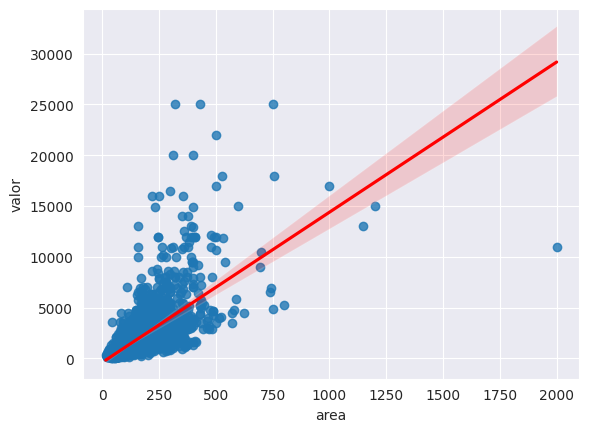

In [ ]:
ax = sns.regplot(data = dados, x = 'area', y = 'valor', line_kws = {'color': 'r'})
plt.show()

> #### <strong><font color="#203f75" size= 6>Observações:</font></strong>


A plotagem do gráfico mostra que a maior parte dos valores das hospedagens encontram-se na faixa entre 0 e 10000 reais e as áreas entre 0 e 500 m².
A reta da regressão linear mostra que a medida que a área aumenta, torna-se mais difícil prever o valor do aluguel a medida que a área  aumenta.

## **02 - Análises gráficas**

#### **Comportamento da variável dependente**

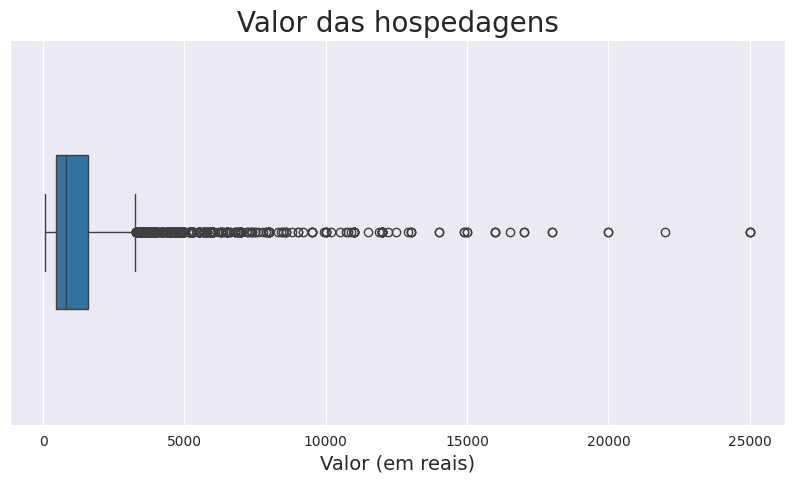

In [ ]:
ax = sns.boxplot(data = dados, x = 'valor', width = 0.4 )
ax.figure.set_size_inches(10,5)
ax.set_title('Valor das hospedagens', fontsize = 20)
ax.set_xlabel('Valor (em reais)', fontsize = 14)
plt.show()

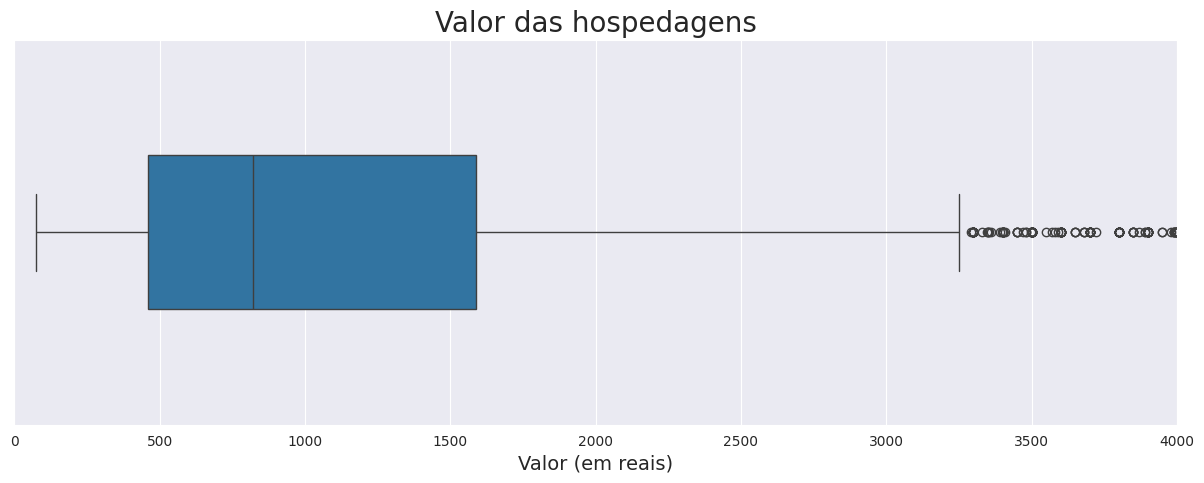

In [ ]:
ax = sns.boxplot(data = dados, x = 'valor', width = 0.4 )
ax.figure.set_size_inches(15,5)
ax.set_title('Valor das hospedagens', fontsize = 20)
ax.set_xlabel('Valor (em reais)', fontsize = 14)
ax.set_xlim(0,4000)
plt.show()

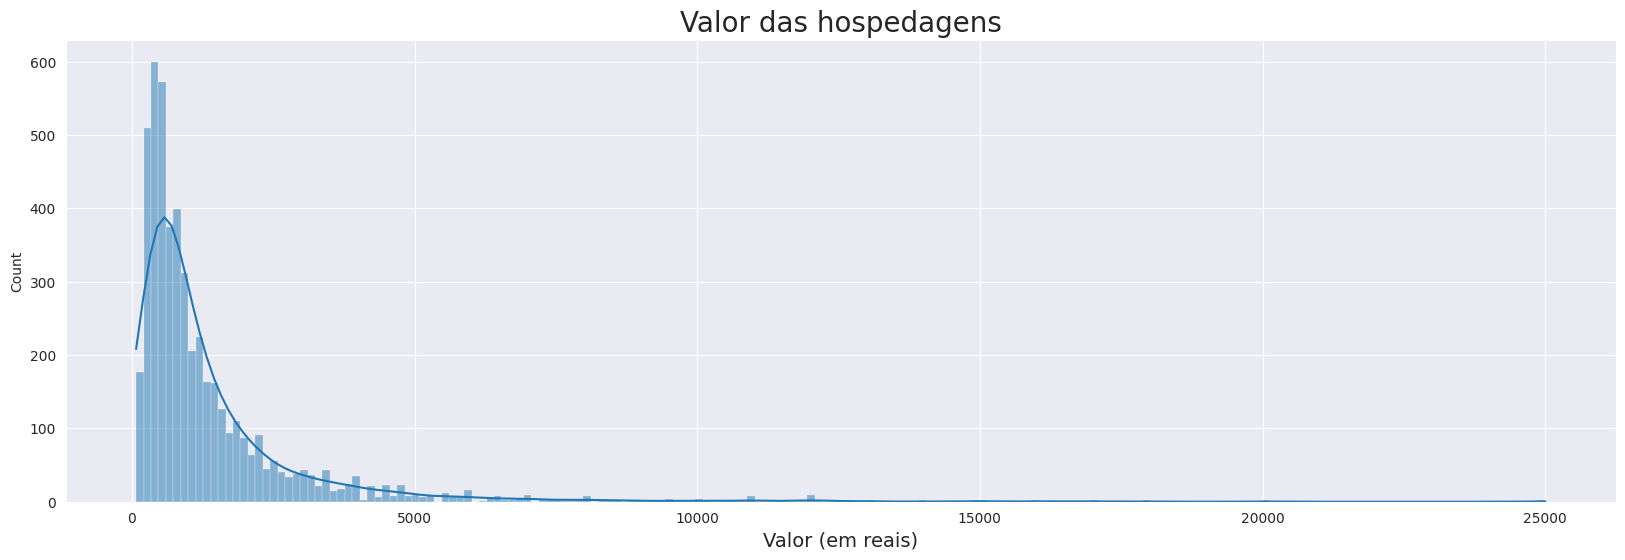

In [ ]:
ax = sns.histplot(data = dados['valor'], kde = True )
ax.figure.set_size_inches(20,6)
ax.set_title('Valor das hospedagens', fontsize = 20)
ax.set_xlabel('Valor (em reais)', fontsize = 14)
plt.show()

> #### <strong><font color="#203f75" size= 6>Observações:</font></strong>

Notamos uma concentração de valores entre primeiro e o terceiro quartil, aproximadamente entre 400,00 reais e 1600,00 reais. Isso indica que a maioria dos valores das hospedagens está entre esse valores .O boxplot mostra outliers com valores de aluguéis acima de 3250,00 reais.
O histograma mostra a distribuição das frequências dos valores das hospedagens mais à esquerda, mostrando uma curva asimetrica.

### **Análise das variáveis explicativas em relação ao valor**

In [ ]:
dados.columns

Index(['valor', 'area', 'dist_praia', 'dist_mercado', 'piscina'], dtype='object')

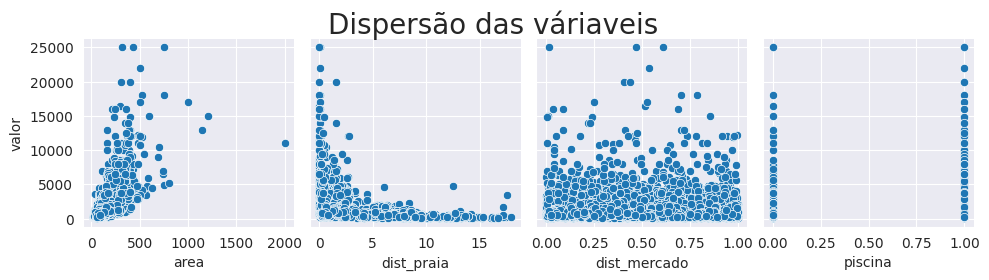

In [ ]:
# Pairplot sem reta de regressão
ax = sns.pairplot(data = dados, y_vars = 'valor', x_vars = ['area', 'dist_praia', 'dist_mercado', 'piscina'])
ax.figure.suptitle('Dispersão das váriaveis', fontsize = 20, y = 1.08)
plt.show()

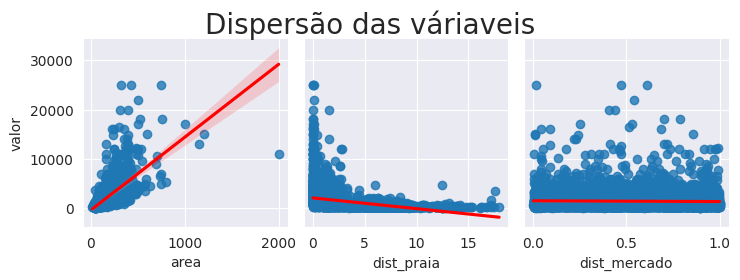

In [ ]:
# Pairplot com reta de regressão
ax = sns.pairplot(data = dados, y_vars = 'valor', x_vars = ['area', 'dist_praia', 'dist_mercado'], kind = 'reg', plot_kws = {'line_kws':{'color': 'red'}} )
ax.figure.suptitle('Dispersão das váriaveis', fontsize = 20, y = 1.08)
plt.show()

> #### <strong><font color="#203f75" size= 6>Observações:</font></strong>

O primeiro gráfico, que mostra a relação do valor aluguel e a área da hospedagem, observamos um comportamento similar ao que vimos no exemplo de regressão linear com uma variável. Podemos imaginar uma reta crescente dos dados, mas notamos um comportamento mais explosivo à medida que a área se aproxima de 500 m².

O segundo gáfico mostra a relação com a distância da praia, ao contrário do primeiro gráfico a relação não é linear, ao contrário é curvilinea e exponencial inversa.

A distância do mercado não mostra uma relação clara,  o que sugere que essa variável pode não ser muito relevante para o nosso modelo, já que diferentes valores de distância do mercado correspondem tanto a valores altos quanto a valores baixos de aluguéis, sem um padrão evidente.

Por fim, o ultimo gráfico mostra uma variável binária. Os pontos se dividem entre 0 e 1, confirmando que a variável é binária, não mostrando uma tendência muita clara.

Ao plotarmos reta notamos o comportamento linear na variável área, enquanto a váriavel distância da praia mostra um comportamento decrescente, indicando que a maior distância da praia diminui o valor do aluguel. Analisando a distância do mercado observamos uma reta, que não indica uma tedência positiva ou negativa.

## **03 - Transformação de variáveis**

### **Transformando os dados**

In [ ]:
dados.describe()

,valor,area,dist_praia,dist_mercado,piscina
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1402.926374,121.944800,3.021928,0.497156,0.505600
std,1883.268839,90.536969,3.170927,0.291359,0.500019
min,75.000000,16.000000,0.000000,0.000000,0.000000
25%,460.000000,70.000000,0.438000,0.239000,0.000000
50%,820.000000,93.000000,1.476500,0.503000,1.000000
75%,1590.000000,146.000000,5.605500,0.748000,1.000000
max,25000.000000,2000.000000,17.963000,1.000000,1.000000


In [ ]:
dados['log_valor'] = np.log(dados['valor'])
dados['log_area'] = np.log(dados['area'])
dados['log_dist_praia'] = np.log1p(dados['dist_praia'])
dados['log_dist_mercado'] = np.log1p(dados['dist_mercado'])

In [ ]:
# Lendo os dados
dados.head(3)

,valor,area,dist_praia,dist_mercado,piscina,log_valor,log_area,log_dist_praia,log_dist_mercado
0,4600.0,280,0.241,0.794,1,8.433812,5.634790,0.215918,0.584448
1,900.0,208,0.904,0.134,1,6.802395,5.337538,0.643957,0.125751
2,2550.0,170,0.060,0.423,1,7.843849,5.135798,0.058269,0.352767


### **Distribuição de frequências da variável dependente transformada**

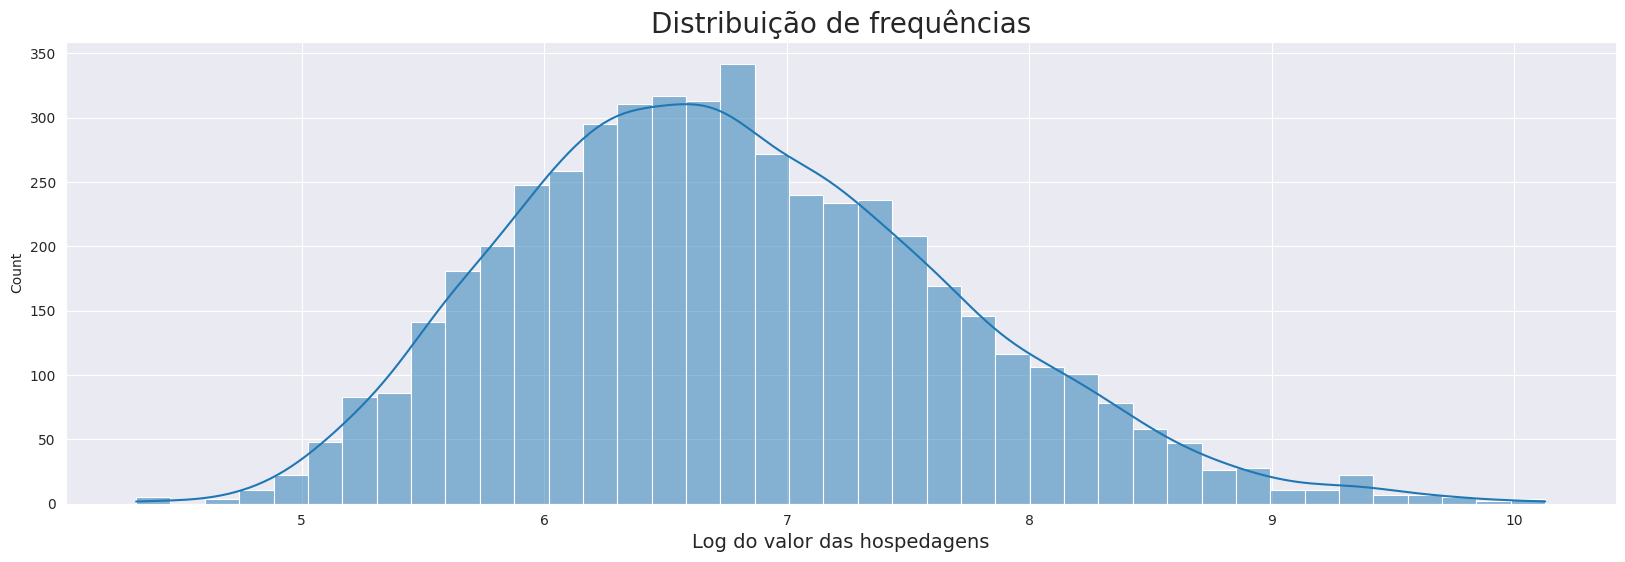

In [ ]:
ax = sns.histplot(data = dados['log_valor'], kde = True )
ax.figure.set_size_inches(20,6)
ax.set_title('Distribuição de frequências', fontsize = 20)
ax.set_xlabel('Log do valor das hospedagens', fontsize = 14)
plt.show()

> #### <strong><font color="#203f75" size= 6>Observações:</font></strong>

Observamos que nossa variével apresenta uma asimetria a direita, ou seja, possuimos um grande volume de valores hospedagens concentrados (valores padrões) e poucos com valores altos (valores das hospedagens de imóveis de luxo).

O tratamento realizado nos dados mostrou uma distribuição mais simétrica, .

### **Análise das variáveis explicativas transformadas em relação ao valor**

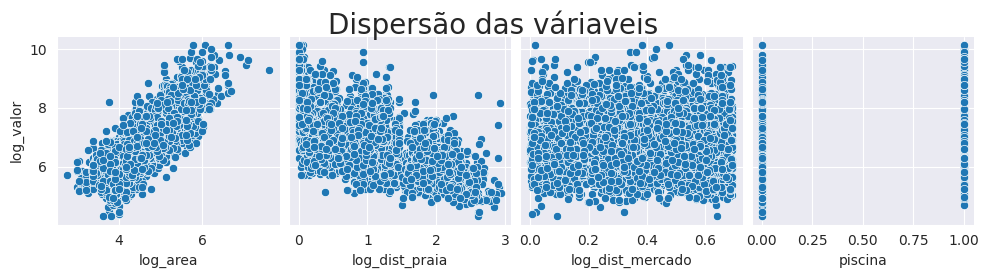

In [ ]:
ax = sns.pairplot(data = dados, y_vars = 'log_valor', x_vars = ['log_area', 'log_dist_praia', 'log_dist_mercado', 'piscina'])
ax.figure.suptitle('Dispersão das váriaveis', fontsize = 20, y = 1.07)
plt.show()

> #### <strong><font color="#203f75" size= 6>Observações:</font></strong>



## **04 - Regressão linear múltipla**

### **Dividindo os dados em treino e teste**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = dados['log_valor']
X = dados[['log_area', 'log_dist_praia', 'log_dist_mercado', 'piscina']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1991)

### **Estimando modelo de regressão linear e avaliando as estatísticas do modelo**

In [ ]:
import statsmodels.api as sm

In [ ]:
X_train_sm = sm.add_constant(X_train)
modelo_stats = sm.OLS(y_train, X_train_sm, hasconst = True)
modelo_treinado = modelo_stats.fit()

In [ ]:
print(modelo_treinado.summary())

                            OLS Regression Results                            
Dep. Variable:              log_valor   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     3741.
Date:                Thu, 11 Sep 2025   Prob (F-statistic):               0.00
Time:                        12:24:13   Log-Likelihood:                -1695.6
No. Observations:                3500   AIC:                             3401.
Df Residuals:                    3495   BIC:                             3432.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.5687      0.064  

> #### <strong><font color="#203f75" size= 6>Observações:</font></strong>

O R² é o coeficiente de determinação, que diz o quanto a reta se ajustou aos dados. Nesse caso, temos o número 0.811; como o valor vai de 0 a 1, 81,1% do valor da variável dependente consegue ser explicada por esse modelo.

O F-statistic e a Prob (F-statistic), referentes ao teste F, avalia as variáveis conjuntamente, testando a significância.Para o nível de confiança de 95%, que é mais usual, procuramos a aceitação de 5%. Ela deve ser menor ou igual a 0.05. O teste resulta em 0.00, um número muito menor que 0.05. Logo, nosso modelo consegue passar no teste F, então todas as características juntas conseguem explicar bem o modelo e gerar um resultado útil.

O teste T, verifica as variáveis isoladamente, sendo assim, ele irá analisar cada uma das características e testar também para essa faixa de 5%, que seria 0.05. No modelo todas as variáveis passam no teste, exceto a variável log_dist_mercado. A análise gráfica realizada indicou que essa variável não parecia tão boa para o nosso modelo. Com esse resultado, provamos estatisticamente que deu 0.725, muito acima de 0.05.

### **Treinando o modelo**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
# Atualizando as variáveis de entrada do modelo
X_train_novo = X_train[['log_area', 'log_dist_praia', 'piscina']]
X_test_novo = X_test[['log_area', 'log_dist_praia', 'piscina']]

In [ ]:
# Instanciando o modelo
modelo = LinearRegression()

In [ ]:
# Treinando o modelo com os dados de treino
modelo.fit(X_train_novo, y_train)

LinearRegression()

In [ ]:
print(f"R² = {round(modelo.score(X_train_novo, y_train),3)}")

R² = 0.811


In [ ]:
y_previsto = modelo.predict(X_test_novo)

In [ ]:
print(f"R² = {round(r2_score(y_test, y_previsto), 3)}")

R² = 0.808


### **Precificando uma hospedagem**

<img src="https://github.com/afonsosr2/data-science-regressao-linear/blob/main/imagens/quanto_custa_slide_2.png?raw=true" alt="Imagem de uma casa e suas características para precificação" width=720>

In [ ]:
#Nova hospedagem
hospedagem = pd.DataFrame({
    'log_area': [np.log(100)],
    'log_dist_praia' : [np.log1p(0)],
    'piscina': [1]


})

In [ ]:
valor = modelo.predict(hospedagem)
valor

array([7.35561897])

In [ ]:
print(f' R$ {np.exp(valor)[0]:,.2f}')

 R$ 1,564.97


## **05 - Entendendo os resultados**

### **Obtendo o intercepto e coeficientes**

In [ ]:
## lendo o valor do intercepto em log
modelo.intercept_

np.float64(2.573837672772364)

In [ ]:
## Transformando o efeito do intercepto em reais
np.exp(modelo.intercept_)

np.float64(13.116063137821113)

In [ ]:
# Lendo os coeficientes
modelo.coef_

array([ 1.00288382, -0.46477156,  0.16333064])

In [ ]:
## Criando o índice dos coeficientes
index = ['Intercepto', 'log_area', 'log_dist_praia', 'piscina']

In [ ]:
#Criando o dataframe
df_parametros = pd.DataFrame(data = np.append(modelo.intercept_, modelo.coef_), index = index, columns = [ 'Parâmetros'])
df_parametros.round(3)

,Parâmetros
Intercepto,2.574
log_area,1.003
log_dist_praia,-0.465
piscina,0.163


### **Interpretando os coeficientes**

**Intercepto →** Excluindo o efeito de todas as variáveis explicativas, o efeito médio no Valor da Hospedagem, seria de **R$ 13.11**. (exp[2.574])

**Área da hospedagem (m²)** → Mantendo-se os valores de todas as outras variáveis explicativas constantes, um acréscimo de 1% na Área da hospedagem gera, em média, um **acréscimo de 1,003% no Valor da Hospedagem.

**Distância até a praia (km)** → Mantendo-se os valores de todas as outras variáveis explicativas constantes, um acréscimo de 1% na Distância até a praia gera, em média, um **decréscimo de 0,465%** no Valor da Hospedagem.



In [ ]:
# Efeito da dummy
print(f'Efeito da dummy: {100 * np.expm1(df_parametros.loc["piscina"][0]):.2f}%')

Efeito da dummy: 17.74%


/tmp/ipython-input-3633792087.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Efeito da dummy: {100 * np.expm1(df_parametros.loc["piscina"][0]):.2f}%')


> #### <strong><font color="#203f75" size= 6>Observações:</font></strong>

 A casa não tinha um segundo andar e passou a ter após uma construção, seu valor vai ser aumentado em 17.74%.

 As variações que obtivemos dos nossos coeficientes representaram taxas. Sendo assim, quando as pessoas vendedoras utilizarem o modelo, ou o que foi aprendido a partir desse modelo, elas podem fazer esse cálculo de variação do valor em relação às variáveis explicativas, sem necessariamente utilizar o modelo para isso.

### **Analisando graficamente os resultados do modelo**

In [ ]:
# Gerando previsões para os dados de treino
y_train_previsto = modelo.predict(X_train_novo)

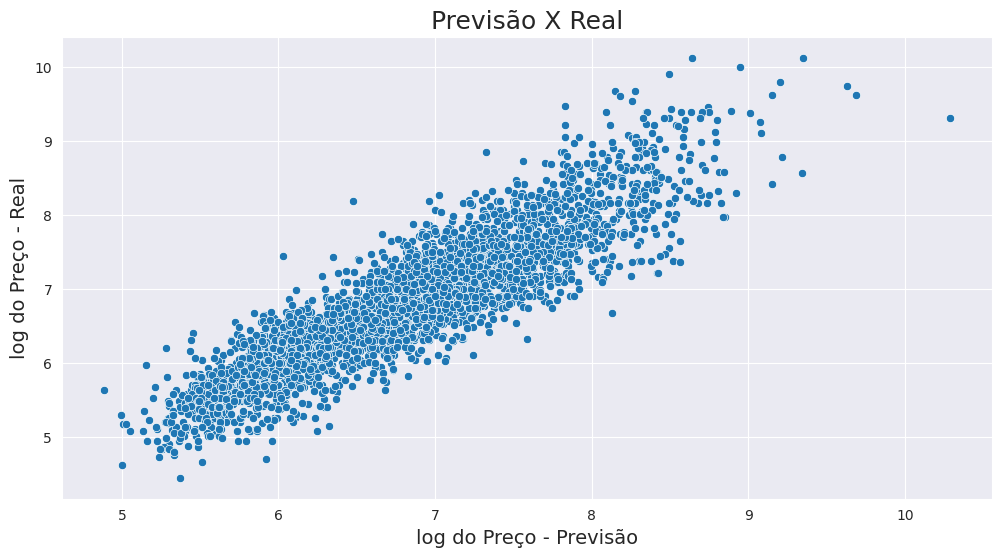

In [ ]:
#Grafico de valor estimado e valor real
ax = sns.scatterplot(y = y_train, x = y_train_previsto)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('log do Preço - Previsão', fontsize=14)
ax.set_ylabel('log do Preço - Real', fontsize=14)
plt.show()

> #### <strong><font color="#203f75" size= 6>Observações:</font></strong>

 Observamos que a previsão dos valores mostra que eles estão muito próximos uns dos outros, com uma concentração significativa na região analisada. Há alguns casos isolados de pontos mais distantes, mas, em geral, a escala é consistente. Assim, os valores estimados estão muito próximos dos valores reais, indicando que o modelo tem uma boa performance.

In [ ]:
# Obtendo os resíduos
residuo = y_train - y_train_previsto

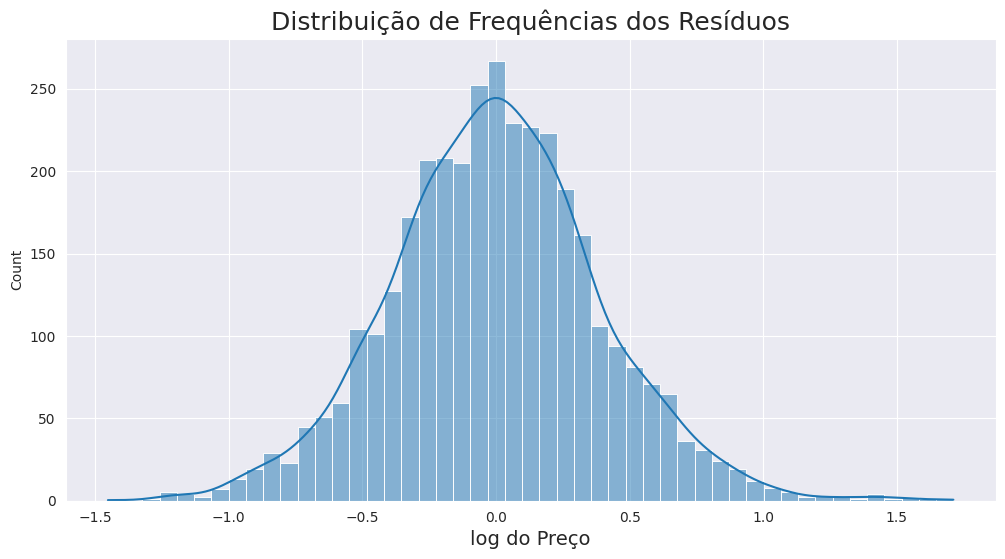

In [ ]:
#Observando o comportamento dos residuos
ax = sns.histplot(residuo, kde=True)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('log do Preço', fontsize=14)
plt.show()

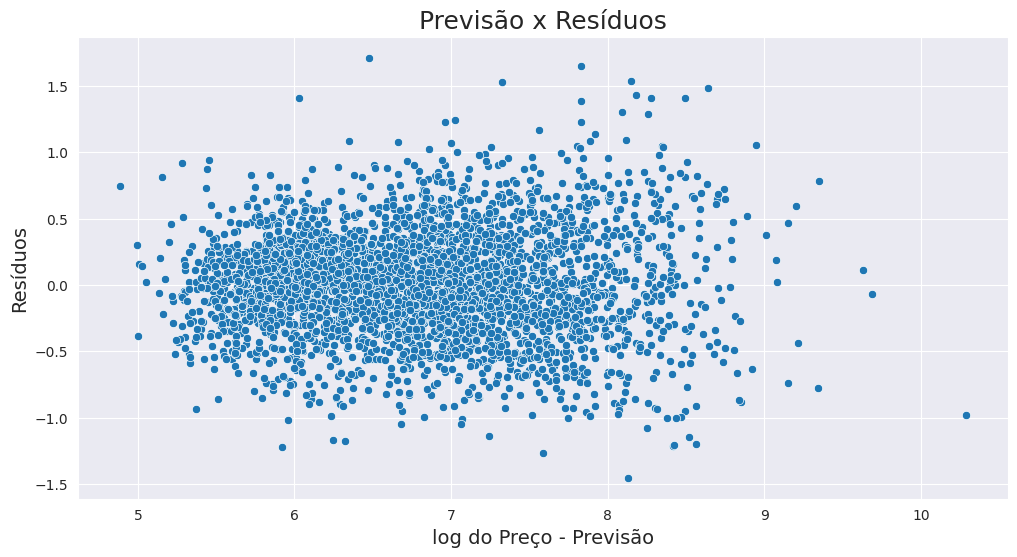

In [ ]:
# Homocedasticidade do modelo
ax = sns.scatterplot(x= y_train_previsto, y=residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão x Resíduos', fontsize=18)
ax.set_xlabel('log do Preço - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
plt.show()


> #### <strong><font color="#203f75" size= 6>Observações:</font></strong>

Em uma regressão linear, é ideal que os resíduos tenham uma média próxima de zero. Observamos que a curva mostra que a maioria dos dados está de fato oscilando em torno de zero, com valores bastante pequenos.

Os resíduos estão bem espalhados no gráfico, indicando que o modelo apresenta homocedasticidade. Não há um padrão claro de movimento curvo, subida ou descida nos resíduos. Isso sugere que o modelo está respondendo bem.

### **Aplicando o modelo para precificar mais hospedagens**

In [ ]:
# Hospedagens a precificar:
hospedagens = pd.DataFrame({
    'area': [460, 360, 220, 500, 150, 280, 460, 260, 300, 180],
    'dist_praia': [5.5, 2.0 , 4.0 , 1.5, 1.0 , 6.0 , 3.0 , 1.0 , 0.5, 6.0 ],
    'piscina': [1, 0, 0, 1, 0, 0, 1, 0, 0, 1] })
hospedagens

,area,dist_praia,piscina
0,460,5.5,1
1,360,2.0,0
2,220,4.0,0
3,500,1.5,1
4,150,1.0,0
5,280,6.0,0
6,460,3.0,1
7,260,1.0,0
8,300,0.5,0
9,180,6.0,1


In [ ]:
hospedagens.columns = ["log_area", "log_dist_praia", "piscina"]

In [ ]:
hospedagens['log_area'] = np.log(hospedagens['log_area'])
hospedagens['log_dist_praia'] = np.log1p(hospedagens['log_dist_praia'])

In [ ]:
previsoes = modelo.predict(hospedagens)
previsoes

array([8.01611573, 7.96631241, 7.23499849, 8.54383234, 7.27676763,
       7.32047329, 8.24176595, 7.8284002 , 8.10562017, 7.04069701])

In [ ]:
for i, previsao in enumerate(previsoes):
  print(f'Hospedagem {i+1} --> R$ {np.exp(previsao):,.2f}')

Hospedagem 1 --> R$ 3,029.39
Hospedagem 2 --> R$ 2,882.21
Hospedagem 3 --> R$ 1,387.14
Hospedagem 4 --> R$ 5,134.99
Hospedagem 5 --> R$ 1,446.31
Hospedagem 6 --> R$ 1,510.92
Hospedagem 7 --> R$ 3,796.24
Hospedagem 8 --> R$ 2,510.91
Hospedagem 9 --> R$ 3,313.04
Hospedagem 10 --> R$ 1,142.18
